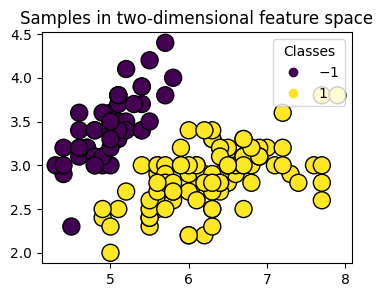

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import datasets,svm
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()

def toLine(a):
    if(a == 0): 
        return -1
    return 1

applyAll = np.vectorize(toLine)



X = np.array(iris.data[:, :2])
y = np.array(applyAll(iris.target))

# Plotting settings
fig, ax = plt.subplots(figsize=(4, 3))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

In [209]:
def SVM(K, fi, M, y):
  m1 = np.full((M,1), 1)
  zero = np.full((1,1),0)
  m1t =  np.full((1,M), 1)
  m1t = np.hstack((zero, m1t))

  identity = np.matrix(np.identity(M, dtype=int))

  val = K + ((1/fi)) * identity
  val = np.hstack((m1, val))
  val = np.vstack((m1t, val))

  y_ = y.reshape((M, 1))
  resY = np.vstack((zero, y_))

  print(val)

  res = np.linalg.solve(val, resY)

  return res

x = X
K = []

def k(x0, x1):
  return np.dot(np.array(x0), np.array(x1));

for i in range(0, len(x)):
  K.append([])
  for j in range(0, len(x)):
    K[i].append(k(x[i], x[j]))


#y = y_raw

Kteste = np.matrix(K)
Yteste = y

r = SVM(Kteste,30,len(x),Yteste)

sums = [0, 0]
counts = [0, 0]

for i in range(len(y)):
    if(y[i] == 1):
        sums[0] += r[i,0]
        counts[0] += 1
    if(y[i] == -1):
        sums[1] += r[i,0]
        counts[1] += 1
    

w = [sums[0]/counts[0] , sums[1]/counts[1]]
b = r[0,0]


-0.5536144602485251
[np.float64(3.9576868996488725), np.float64(-8.26174356452774)]


0.21832227802080595


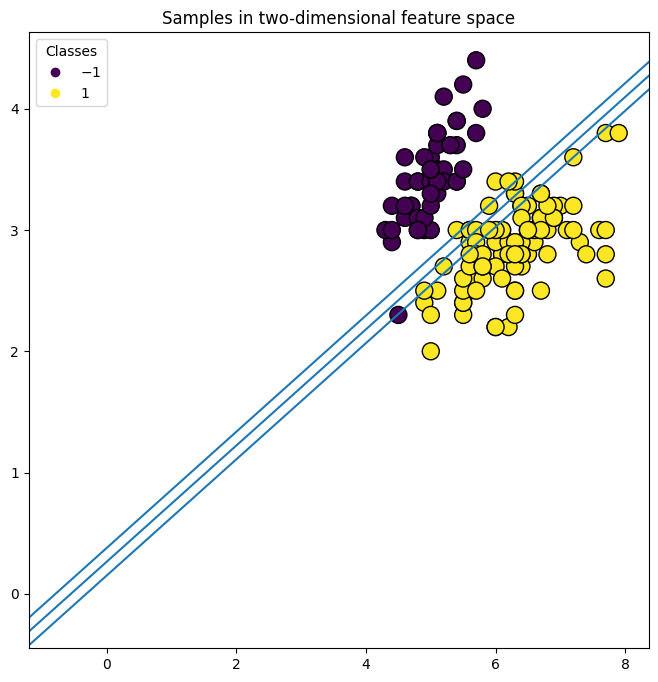

In [210]:
# Plotting settings
fig, ax = plt.subplots(figsize=(8, 8))
ax.axline([b, 0], [b - w[1], w[0]])
margem = 2 / (math.sqrt(w[0]*w[0] + w[1]*w[1]))
print(margem)

# #support vectors
ax.axline([b + margem, margem], [b + margem - w[1], w[0] + margem])
ax.axline([b - margem, -margem], [b - margem - w[1] , w[0] - margem])

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper left", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()